# **Stock Market Forecasting with ARIMA, SARIMA , SARIMAX | A complete Project A-Z**

#**Stock Market Data scraping in Python**


In [2]:
# import Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
#
# Import time series analysis tools from statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Get today's date
dt.date.today()

datetime.date(2025, 7, 12)

In [4]:
# define the dates to fetch data
today = dt.date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = dt.date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
# Print the date range for the data
print("Your data will be between these dates:",start_date, end_date)

Your data will be between these dates: 2024-07-12 2025-07-12


In [5]:
# define the ticker symbol for the stock
ticker = 'GOOGL' #DX-Y.NYB

# Download historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date, progress=False)
# Display the first few rows of the DataFrame
display(df.head())

YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-07-12,184.177841,186.208000,183.600635,184.187788,22898400
2024-07-15,185.630768,187.332531,184.028529,184.028529,16474000
2024-07-16,183.033371,187.770419,182.486019,186.456790,18290700
2024-07-17,180.147354,182.665156,179.032743,182.087951,20734100
2024-07-18,176.833405,181.620214,175.619285,181.052955,25315700


In [6]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-12 to 2025-07-11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   250 non-null    float64
 1   (High, GOOGL)    250 non-null    float64
 2   (Low, GOOGL)     250 non-null    float64
 3   (Open, GOOGL)    250 non-null    float64
 4   (Volume, GOOGL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [7]:
# # Insert the Date index as a new column (commented out)
# df.insert(0, 'Date', df.index, True)

In [8]:
# Add the Date index as a new column
df['Date'] = df.index
# Reset the index to a default integer index and drop the old index
df.reset_index(drop=True, inplace=True)

In [9]:
# Display information about the DataFrame after adding the Date column and resetting the index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Close, GOOGL)   250 non-null    float64       
 1   (High, GOOGL)    250 non-null    float64       
 2   (Low, GOOGL)     250 non-null    float64       
 3   (Open, GOOGL)    250 non-null    float64       
 4   (Volume, GOOGL)  250 non-null    int64         
 5   (Date, )         250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [10]:
# Display the first few rows of the DataFrame after modifications
display(df.head())

Price,Close,High,Low,Open,Volume,Date
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,
0,184.177841,186.208000,183.600635,184.187788,22898400,2024-07-12
1,185.630768,187.332531,184.028529,184.028529,16474000,2024-07-15
2,183.033371,187.770419,182.486019,186.456790,18290700,2024-07-16
3,180.147354,182.665156,179.032743,182.087951,20734100,2024-07-17
4,176.833405,181.620214,175.619285,181.052955,25315700,2024-07-18


In [11]:
# Display the column names of the DataFrame
display(df.columns)

MultiIndex([( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL'),
            (  'Date',      '')],
           names=['Price', 'Ticker'])

In [12]:
# Flatten the MultiIndex columns into single-level column names
df.columns = [''.join(col).strip() for col in df.columns.values]

In [13]:
# Display information about the DataFrame after flattening column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CloseGOOGL   250 non-null    float64       
 1   HighGOOGL    250 non-null    float64       
 2   LowGOOGL     250 non-null    float64       
 3   OpenGOOGL    250 non-null    float64       
 4   VolumeGOOGL  250 non-null    int64         
 5   Date         250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [14]:
# Display the first few rows of the DataFrame after flattening column names
display(df.head())

,CloseGOOGL,HighGOOGL,LowGOOGL,OpenGOOGL,VolumeGOOGL,Date
0,184.177841,186.208000,183.600635,184.187788,22898400,2024-07-12
1,185.630768,187.332531,184.028529,184.028529,16474000,2024-07-15
2,183.033371,187.770419,182.486019,186.456790,18290700,2024-07-16
3,180.147354,182.665156,179.032743,182.087951,20734100,2024-07-17
4,176.833405,181.620214,175.619285,181.052955,25315700,2024-07-18


In [15]:
# Select only the 'Date' and 'Close' columns
df = df[['Date','CloseGOOGL']]
# Display the first few rows of the filtered DataFrame
display(df.head())

,Date,CloseGOOGL
0,2024-07-12,184.177841
1,2024-07-15,185.630768
2,2024-07-16,183.033371
3,2024-07-17,180.147354
4,2024-07-18,176.833405


In [16]:
# Display the shape (number of rows and columns) of the DataFrame
display(df.shape)

(250, 2)

In [17]:
# Create a line plot of the 'CloseGOOGL' price over time using Plotly Express
fig = px.line(df, x='Date', y='CloseGOOGL', title='Time Series Data')
# Display the plot
# fig.show()

In [18]:
# Define a function to check for stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    # Perform the ADF test
    result = adfuller(df)
    # Print the ADF statistic and p-value
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    # Check the p-value to determine stationarity
    if result[1] <= 0.05:
        print('Reject the null hypothesis. data is stationary')
    else:
        print('Fail to reject the null hypothesis.Data is not stationary')

In [19]:
# Check the stationarity of the 'CloseGOOGL' column using the defined function
check_stationarity(df['CloseGOOGL'])

ADF Statistic: -1.671667
p-value: 0.445767
Fail to reject the null hypothesis.Data is not stationary


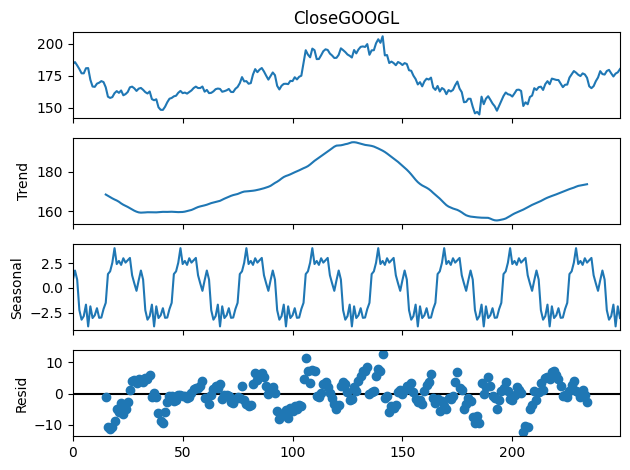

In [20]:
# Perform seasonal decomposition on the 'CloseGOOGL' column
from statsmodels.tsa.seasonal import seasonal_decompose
# Model='additive' assumes the components add up to the observed series.
# Period=30 assumes a seasonality of 30 days (e.g., monthly).
decompose = seasonal_decompose(df['CloseGOOGL'], model='additive', period=30)
# Plot the decomposed components (trend, seasonal, residual)
decompose.plot()
# Display the plot
plt.show()

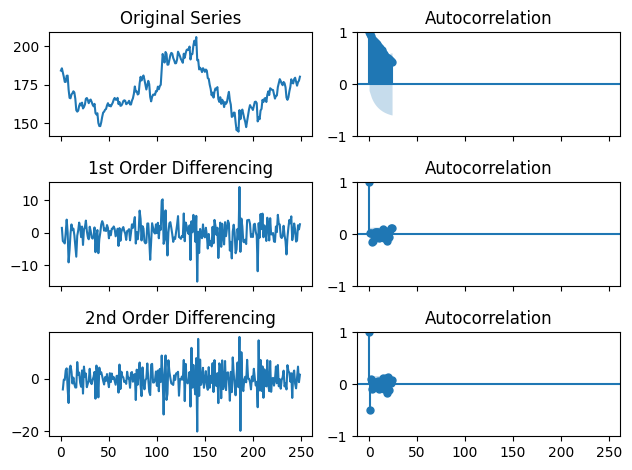

In [21]:
# Import functions for plotting autocorrelation and partial autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for displaying original series and differenced series with their ACF plots
fig, axes = plt.subplots(3, 2, sharex=True)

# Plot the original series and its ACF
axes[0, 0].plot(df['CloseGOOGL'])
axes[0, 0].set_title('Original Series')
plot_acf(df['CloseGOOGL'], ax=axes[0, 1])

# Plot the 1st order differenced series and its ACF
axes[1, 0].plot(df['CloseGOOGL'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['CloseGOOGL'].diff().dropna(), ax=axes[1, 1])

# Plot the 2nd order differenced series and its ACF
axes[2, 0].plot(df['CloseGOOGL'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['CloseGOOGL'].diff().diff().dropna(), ax=axes[2, 1])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
# Display the plots
plt.show()

In [22]:
# Calculate the 1st order differencing of the 'CloseGOOGL' column
df['CloseGOOGL_diff'] = df['CloseGOOGL'].diff()
# Display the first few rows of the DataFrame with the new differenced column
display(df.head())

,Date,CloseGOOGL,CloseGOOGL_diff
0,2024-07-12,184.177841,NaN
1,2024-07-15,185.630768,1.452927
2,2024-07-16,183.033371,-2.597397
3,2024-07-17,180.147354,-2.886017
4,2024-07-18,176.833405,-3.313950


In [23]:
# Check the stationarity of the 1st order differenced 'CloseGOOGL' column
check_stationarity(df['CloseGOOGL_diff'].dropna())

ADF Statistic: -9.770815
p-value: 0.000000
Reject the null hypothesis. data is stationary


In [24]:
# Calculate the 2nd order differencing of the 'CloseGOOGL' column
df['CloseGOOGL_diff2'] = df['CloseGOOGL'].diff().diff()
# Display the first few rows of the DataFrame with the new 2nd order differenced column
display(df.head())

,Date,CloseGOOGL,CloseGOOGL_diff,CloseGOOGL_diff2
0,2024-07-12,184.177841,NaN,NaN
1,2024-07-15,185.630768,1.452927,NaN
2,2024-07-16,183.033371,-2.597397,-4.050323
3,2024-07-17,180.147354,-2.886017,-0.288620
4,2024-07-18,176.833405,-3.313950,-0.427933


d=1

#**Lets find p value**

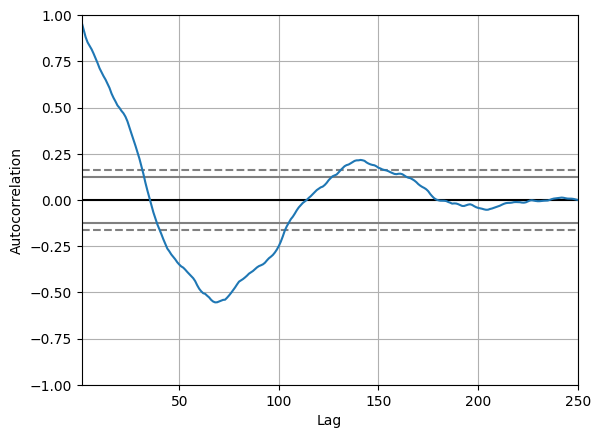

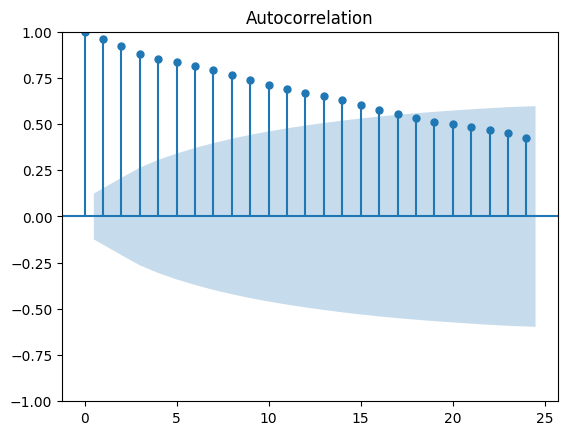

           0
0   1.000000
1   0.961609
2   0.921642
3   0.880844
4   0.852285
5   0.833766
6   0.814947
7   0.791606
8   0.766262
9   0.740344
10  0.712107
11  0.690530
12  0.669499
13  0.651008
14  0.628741
15  0.605564
16  0.575657
17  0.552390
18  0.532530
19  0.511009
20  0.498050
21  0.481731
22  0.468700
23  0.450315


In [25]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['CloseGOOGL'])

plot_acf(df['CloseGOOGL'], alpha=0.05)

# plot_pacf(df['CloseGOOGL'])
plt.show()

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['CloseGOOGL']))
print(x_acf)

**P=2**

# **Lets find q value**

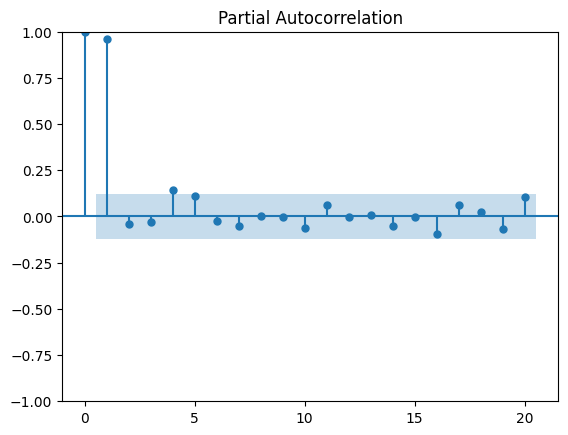

In [26]:
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['CloseGOOGL'],lags=20, alpha=0.05)
plt.show()

In [27]:
p = 2
d = 1
q = 2

In [28]:
!pip install pmdarima

In [29]:


from pmdarima.arima import auto_arima

model = auto_arima(df['CloseGOOGL'], start_p=1, start_q=1, max_p=2, max_q=2, m = 12, start_P=0, seasonal=True, d=1, D=1, trace= True, error_action='ignore', suppress_warnings=True )



c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1301.964, Time=0.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1432.022, Time=0.06 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1340.801, Time=0.24 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1300.018, Time=0.48 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1433.995, Time=0.15 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1300.018, Time=1.42 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1340.821, Time=0.39 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=5.00 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1300.057, Time=5.36 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1300.395, Time=1.77 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1324.247, Time=0.45 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1301.967, Time=6.69 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1298.243, Time=0.48 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1298.173, Time=0.50 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1298.627, Time=1.12 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1339.309, Time=0.36 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1298.181, Time=3.43 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1300.003, Time=1.02 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=1299.723, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 30.448 seconds


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -647.086
Date:                              Sat, 12 Jul 2025   AIC                           1298.173
Time:                                      12:28:38   BIC                           1305.109
Sample:                                           0   HQIC                          1300.969
                                              - 250                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8795      0.055    -15.874      0.000      -0.988      -0.771
sigma2        12.7791      0.830     15.399      0.000      11.153      14.406
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                69.24
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model = auto_arima(df['CloseGOOGL'], seasonal=True, suppress_warnings=True)


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\env

In [32]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -662.275
Date:                Sat, 12 Jul 2025   AIC                           1330.549
Time:                        12:28:42   BIC                           1341.114
Sample:                             0   HQIC                          1334.801
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2326      2.350      2.652      0.008       1.627      10.838
ar.L1          0.9640      0.014     71.041      0.000       0.937       0.991
sigma2        11.5847      0.748     15.488      0.0

In [33]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 2, 1, 2

model = ARIMA(df['CloseGOOGL'], order=(p, d, q))
model = model.fit()


In [34]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             CloseGOOGL   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -656.285
Date:                Sat, 12 Jul 2025   AIC                           1322.570
Time:                        12:28:42   BIC                           1340.158
Sample:                             0   HQIC                          1329.650
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3782      0.038     36.425      0.000       1.304       1.452
ar.L2         -0.9633      0.041    -23.652      0.000      -1.043      -0.883
ma.L1         -1.3816      0.049    -28.485      0.0

                               SARIMAX Results                                
Dep. Variable:             CloseGOOGL   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -656.285
Date:                Sat, 12 Jul 2025   AIC                           1322.570
Time:                        12:28:43   BIC                           1340.158
Sample:                             0   HQIC                          1329.650
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3782      0.038     36.425      0.000       1.304       1.452
ar.L2         -0.9633      0.041    -23.652      0.000      -1.043      -0.883
ma.L1         -1.3816      0.049    -28.485      0.0

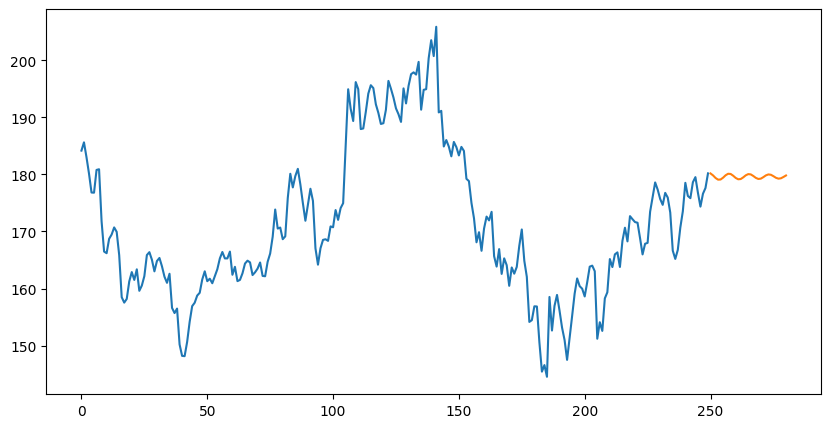

In [35]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 2, 1, 2

model = ARIMA(df['CloseGOOGL'], order=(p, d, q))
model = model.fit()

print(model.summary())

forecast = model.predict(len(df['CloseGOOGL']), len(df['CloseGOOGL']) +30)
# print(forecast)


plt.figure(figsize=(10, 5))
plt.plot(df['CloseGOOGL'], label='Actual')
plt.plot(forecast, label='Forecast')


In [38]:
import statsmodels.api as sm
import warnings

p, d, q, = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['CloseGOOGL'],
                                   order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [39]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         CloseGOOGL   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -641.847
Date:                            Sat, 12 Jul 2025   AIC                           1301.695
Time:                                    12:42:23   BIC                           1332.907
Sample:                                         0   HQIC                          1314.275
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5893      0.089     -6.602      0.000      -0.764      -0.414
ar.L2         -0.8462      0.082   

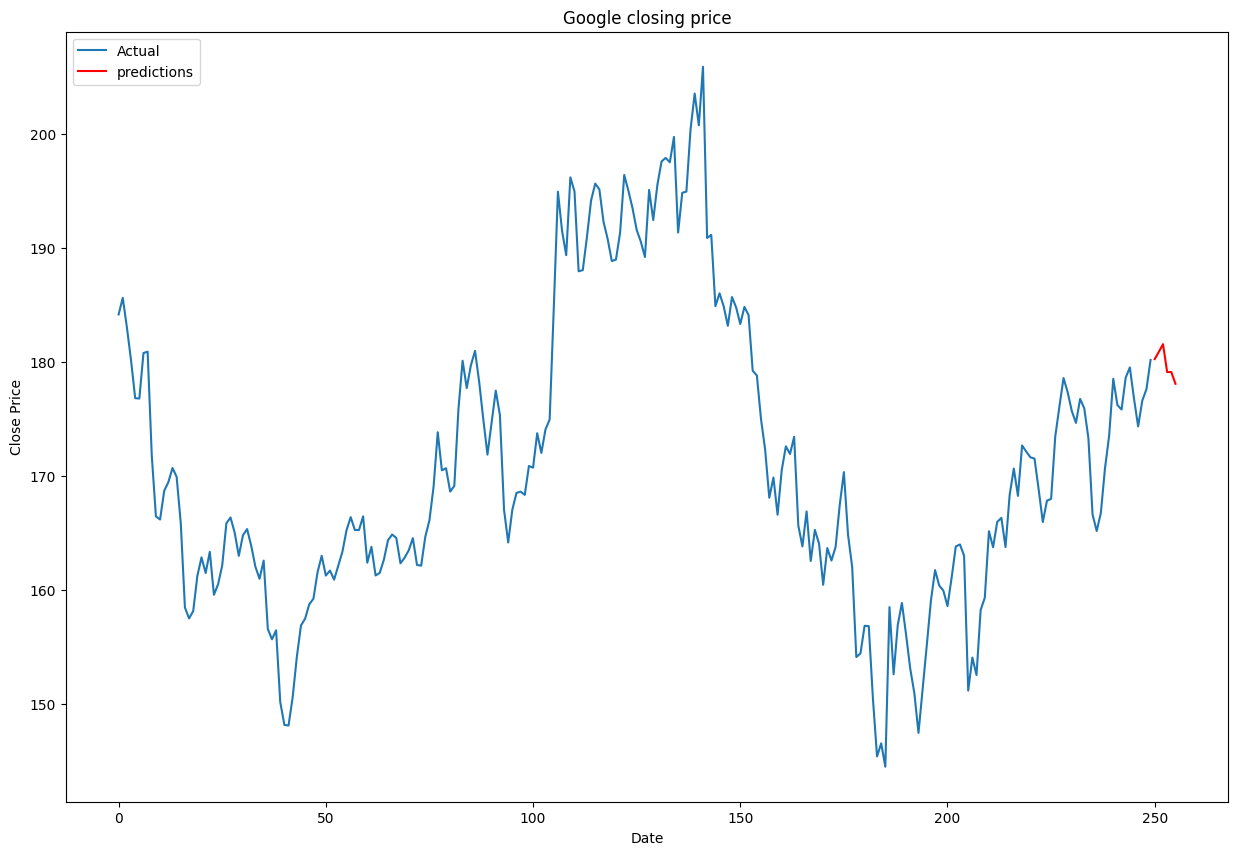

In [45]:
predictions = model.predict(start=len(df['CloseGOOGL']),end=len(df['CloseGOOGL'])+5)


plt.figure(figsize=(15, 10))
plt.plot(df['CloseGOOGL'], label='Actual')
plt.plot(predictions, color='red', label='predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')

plt.legend(loc ='upper left')
plt.show()